---
title: "Mentoring 3"
toc : true
toc-depth : 4
---

# Dataset Description

Dataset Link: https://www.kaggle.com/datasets/laotse/credit-risk-dataset

Dataset berisi data terkait peminjam uang.
Data ini memiliki 12 variabel dengan `loan_status` sebagai variabel dependen (output) dan sisanya sebagai variabel independen (input).

Berikut adalah deskripsi mengenai arti dari setiap kolom pada data:

<div style="text-align: center;">

|Feature Name|	Description|
|:--|:--|
|person_age	|Age|
|person_income|	Annual Income|
|person_home_ownership|	Home ownership|
|person_emp_length|	Employment length (in years)|
|loan_intent|	Loan intent|
|loan_grade|	Expected Risk Grade|
|loan_amnt|	Loan amount|
|loan_int_rate|	Interest rate|
|loan_status|	0 : non default, 1: default|
|loan_percent_income|	Percent income|
|cb_person_default_on_file|	Historical default|
|cb_preson_cred_hist_length|	Credit history length|

</div>

Catatan:
- Tidak terdapat keterangan mengenai mata uang yang digunakan pada `person_income` dan `loan_amnt`
- `loan_grade` adalah klasifikasi ekspektasi risiko pemberian pinjaman, yaitu A sampai G untuk pinjaman dengan risiko default (gagal bayar) yang rendah hingga tinggi. (sumber:https://blog.groundfloor.com/groundfloorblog/about-loan-grading)

# Modeling Workflow

Tujuan: Membuat model Classifier (default, non default) untuk meminimalkan potensi kerugian.

## Task 1: Data Preparation

In [ ]:
import pandas as pd
import numpy as np

### Load the Data

In [ ]:
def read_data(fname):
  filename = '/content/' + fname

  # read csv as pandas dataframe
  dataset = pd.read_csv(filename)
  dataset['id'] = dataset.index
  dataset.set_index('id', inplace = True)
  print('Data shape raw               : ', dataset.shape)

  # drop duplicates
  print('Number of duplicates         : ', dataset.duplicated().sum())

  dataset.drop_duplicates(keep = 'last', inplace = True)

  # print data shape
  print('Data shape after dropping    : ', dataset.shape)

  return dataset

In [ ]:
df = read_data(fname= 'credit_risk_dataset.csv')

Data shape raw               :  (32581, 12)
Number of duplicates         :  165
Data shape after dropping    :  (32416, 12)


In [ ]:
df.head()

person_age  person_income person_home_ownership  person_emp_length  \
id                                                                       
0           22          59000                  RENT              123.0   
1           21           9600                   OWN                5.0   
2           25           9600              MORTGAGE                1.0   
3           23          65500                  RENT                4.0   
4           24          54400                  RENT                8.0   

   loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
id                                                                 
0     PERSONAL          D      35000          16.02            1   
1    EDUCATION          B       1000          11.14            0   
2      MEDICAL          C       5500          12.87            1   
3      MEDICAL          C      35000          15.23            1   
4      MEDICAL          C      35000          14.27            1   

    loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
id                                                                             
0                  0.59                         Y                           3  
1                  0.10                         N                           2  
2                  0.57                         N                           3  
3                  0.53                         N                           2  
4                  0.55                         Y                           4

### Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting the input and output columns

def split_input_output(data, target_col):
  X = data.drop((target_col), axis = 1)
  y = data[target_col]
  print("X shape: " +str(X.shape))
  print("y shape: " + str(y.shape))
  return X, y

In [ ]:
X, y = split_input_output(data=df,
                          target_col='loan_status')

X shape: (32416, 11)
y shape: (32416,)


In [ ]:
X.head()

person_age  person_income person_home_ownership  person_emp_length  \
id                                                                       
0           22          59000                  RENT              123.0   
1           21           9600                   OWN                5.0   
2           25           9600              MORTGAGE                1.0   
3           23          65500                  RENT                4.0   
4           24          54400                  RENT                8.0   

   loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
id                                                                         
0     PERSONAL          D      35000          16.02                 0.59   
1    EDUCATION          B       1000          11.14                 0.10   
2      MEDICAL          C       5500          12.87                 0.57   
3      MEDICAL          C      35000          15.23                 0.53   
4      MEDICAL          C      35000          14.27                 0.55   

   cb_person_default_on_file  cb_person_cred_hist_length  
id                                                        
0                          Y                           3  
1                          N                           2  
2                          N                           3  
3                          N                           2  
4                          Y                           4

In [ ]:
y.head()

id
0    1
1    0
2    1
3    1
4    1
Name: loan_status, dtype: int64

In [ ]:
y.value_counts(normalize = True)

loan_status
0    0.781312
1    0.218688
Name: proportion, dtype: float64

Variabel y memiliki kelas yang imbalance sehingga perlu dilakukan stratified splitting pada train-test split.

In [ ]:
# Train test split
def split_train_test(X,y, test_size = 0.2, seed = 123):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, stratify = y, random_state=seed)
  print("X train shape  : ", X_train.shape)
  print("y train shape  : ", y_train.shape)
  print("X test shape   : ", X_test.shape)
  print("y test shape   : ", y_test.shape)
  print("\n")

  return X_train, X_test, y_train, y_test

In [ ]:
# Training set
X_train, X_test, y_train, y_test = split_train_test(X,y)


X train shape  :  (25932, 11)
y train shape  :  (25932,)
X test shape   :  (6484, 11)
y test shape   :  (6484,)




In [ ]:
print(len(X_train)/len(X))
print(len(X_test)/len(X))

0.7999753208292202
0.20002467917077987


In [ ]:
# Memastikan data test dan train memiliki proporsi kelas yang sama
print(y_train.value_counts(normalize= True))
print(y_test.value_counts(normalize= True))

loan_status
0    0.781313
1    0.218687
Name: proportion, dtype: float64
loan_status
0    0.781308
1    0.218692
Name: proportion, dtype: float64


### EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25932 entries, 30 to 21613
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  25932 non-null  int64  
 1   person_income               25932 non-null  int64  
 2   person_home_ownership       25932 non-null  object 
 3   person_emp_length           25219 non-null  float64
 4   loan_intent                 25932 non-null  object 
 5   loan_grade                  25932 non-null  object 
 6   loan_amnt                   25932 non-null  int64  
 7   loan_int_rate               23433 non-null  float64
 8   loan_percent_income         25932 non-null  float64
 9   cb_person_default_on_file   25932 non-null  object 
 10  cb_person_cred_hist_length  25932 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 2.4+ MB


Keterangan:
- Kolom `person_home_ownership`, `loan_intent`, `loan_grade`, dan  `cb_person_default_on_file` bertipe kategorik.
- Terdapat missing value pada `person_emp_length`(numerik) dan `loan_int_rate` (numerik)

In [ ]:
X_train.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              713
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 2499
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
# Lakukan splitting Variabel x numerik dengan kategorik
def split_num_cat(data, num_cols, cat_cols):
  data_num = data[num_cols]
  data_cat = data[cat_cols]
  print("Numeric Data shape: "+ str(data_num.shape))
  print("Categoric Data shape: "+ str(data_cat.shape))

  return data_num, data_cat

In [ ]:
num_columns = ['person_age', 'person_income', 'person_emp_length',
                'loan_amnt', 'loan_int_rate', 'loan_percent_income',
                'cb_person_cred_hist_length' ]

cat_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

X_train_num, X_train_cat = split_num_cat(X_train, num_columns, cat_columns)

Numeric Data shape: (25932, 7)
Categoric Data shape: (25932, 4)


#### Statistik Deskriptif Data Numerik

In [ ]:
X_train_num.describe().T

count          mean           std      min  \
person_age                  25932.0     27.721734      6.290102    20.00   
person_income               25932.0  65694.299090  51863.661672  4000.00   
person_emp_length           25219.0      4.789405      4.164592     0.00   
loan_amnt                   25932.0   9586.400008   6316.672920   500.00   
loan_int_rate               23433.0     11.013494      3.238078     5.42   
loan_percent_income         25932.0      0.170452      0.106667     0.00   
cb_person_cred_hist_length  25932.0      5.791108      4.041546     2.00   

                                 25%       50%       75%         max  
person_age                     23.00     26.00     30.00      144.00  
person_income               38400.00  55000.00  79000.00  2039784.00  
person_emp_length               2.00      4.00      7.00      123.00  
loan_amnt                    5000.00   8000.00  12250.00    35000.00  
loan_int_rate                   7.90     10.99     13.47       23.22  
loan_percent_income             0.09      0.15      0.23        0.83  
cb_person_cred_hist_length      3.00      4.00      8.00       30.00

Keterangan:
- Terdapat indikasi outlier pada kolom `person_age`, `person_income`, dan  `person_emp_length`.
- Kolom numerik memiliki distribusi nilai yang sangat berbeda satu sama lain.

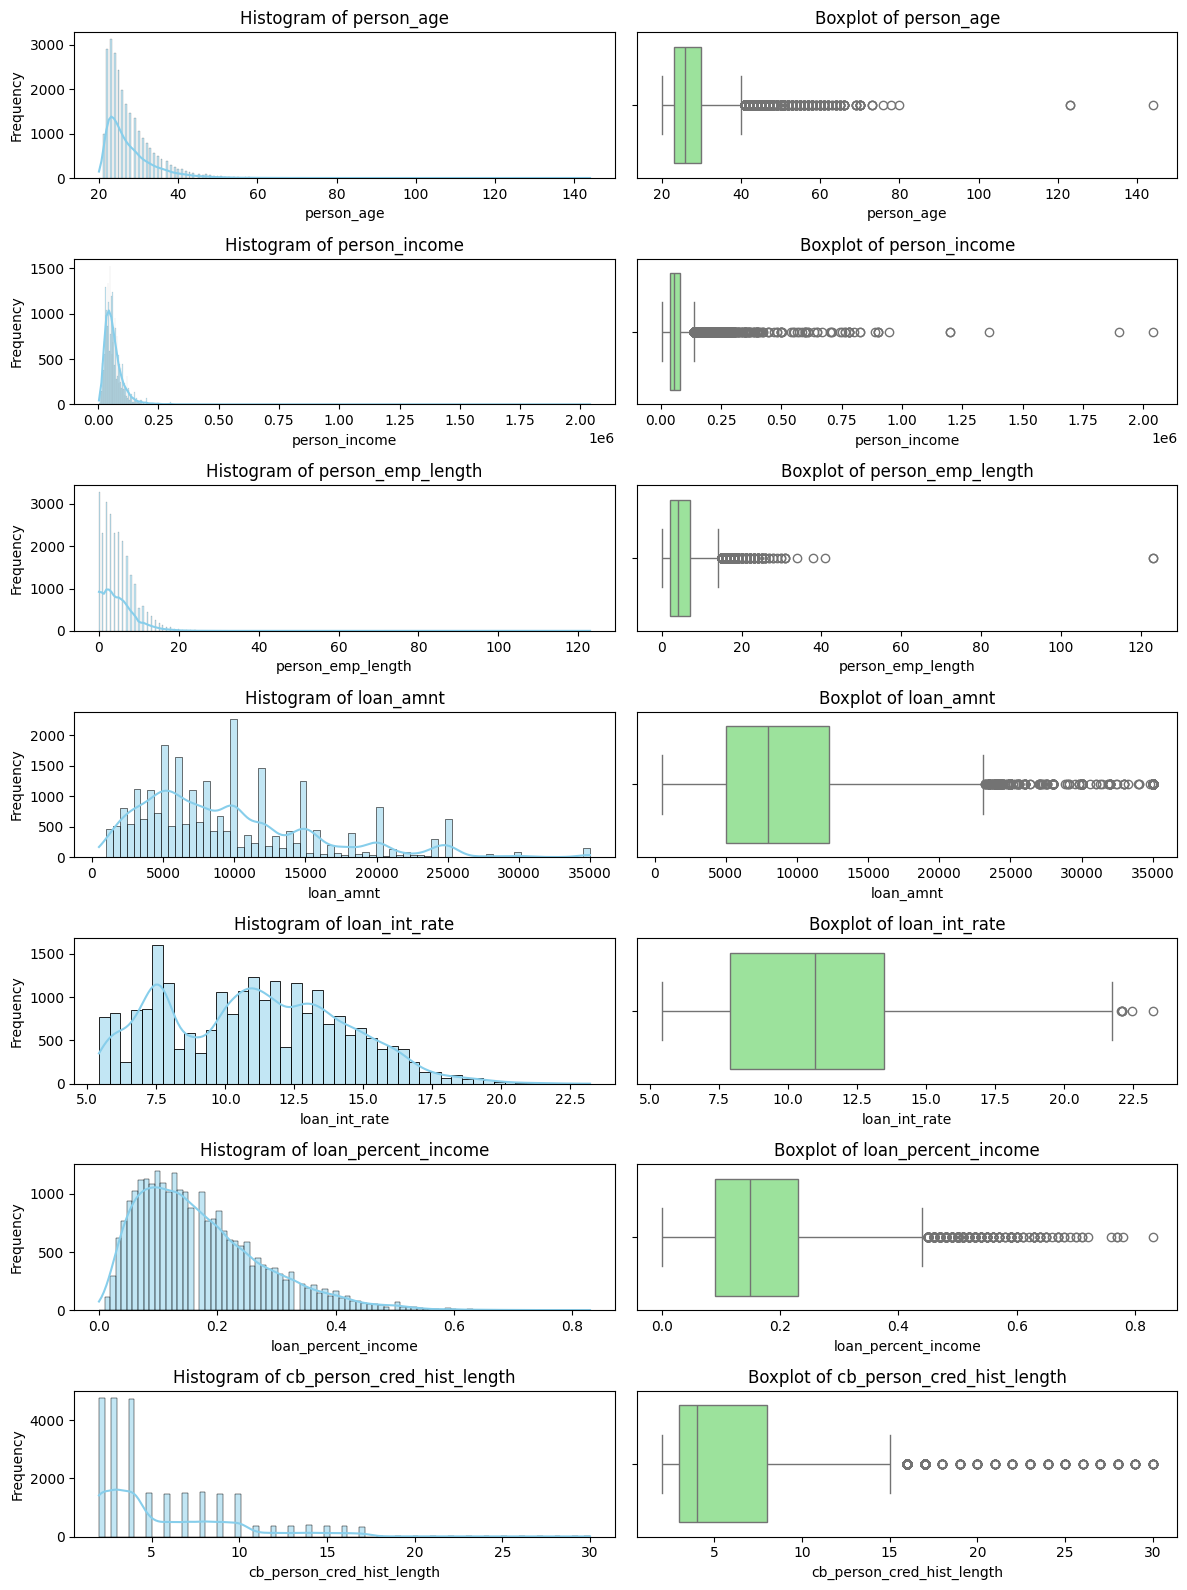

In [ ]:
# Membuat subplot
fig, axes = plt.subplots(len(num_columns), 2, figsize=(12, 16))

# Membuat plot untuk setiap kolom numerik
for i, column in enumerate(num_columns):
   # Histogram dengan KDE
   sns.histplot(X_train_num[column], kde=True, ax=axes[i, 0], color='skyblue')
   axes[i, 0].set_title(f'Histogram of {column}')
   axes[i, 0].set_xlabel(column)
   axes[i, 0].set_ylabel('Frequency')

   # Boxplot
   sns.boxplot(x=X_train_num[column], ax=axes[i, 1], color='lightgreen')
   axes[i, 1].set_title(f'Boxplot of {column}')
   axes[i, 1].set_xlabel(column)

plt.tight_layout()
plt.show()

`person_age`, `person_income`, dan `person_emp_length` memiliki anomali

#### Pemeriksaan Anomali Data Numerik


In [ ]:
X_train_num[X_train_num['person_age']> 100]

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
id                                                                            
81          144         250000                4.0       4800          13.57   
747         123          78000                7.0      20000            NaN   
575         123          80004                2.0      20400          10.25   

     loan_percent_income  cb_person_cred_hist_length  
id                                                    
81                  0.02                           3  
747                 0.26                           4  
575                 0.25                           3

In [ ]:
X_train_num[ X_train_num['person_income'] >= 1_000_000]

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
id                                                                              
32546          60        1900000                5.0       1500            NaN   
31922          47        1362000                9.0       6600           7.74   
29119          36        1200000               16.0      10000           6.54   
30049          42        2039784                0.0       8450          12.29   
17833          32        1200000                1.0      12000           7.51   

       loan_percent_income  cb_person_cred_hist_length  
id                                                      
32546                 0.00                          21  
31922                 0.00                          17  
29119                 0.01                          11  
30049                 0.00                          15  
17833                 0.01                           8

In [ ]:
X_train_num[X_train_num['person_emp_length'] > 60]

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
id                                                                            
0            22          59000              123.0      35000          16.02   
210          21         192000              123.0      20000           6.54   

     loan_percent_income  cb_person_cred_hist_length  
id                                                    
0                   0.59                           3  
210                 0.10                           4

In [ ]:
X_train_num[X_train_num['person_emp_length'] == 0]

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
id                                                                              
32528          65         120000                0.0      12000          11.48   
1657           24          14400                0.0       1600          18.25   
9934           24          65000                0.0       8000          10.99   
18352          29          58000                0.0      20000           9.91   
3441           26          45000                0.0      10800           6.17   
...           ...            ...                ...        ...            ...   
7958           22          54000                0.0       7000          13.61   
2102           24          28800                0.0       2400          14.26   
9267           22          60400                0.0      24000           6.54   
6117           22          48000                0.0       3500           6.54   
4656           22          72000                0.0       9975          10.99   

       loan_percent_income  cb_person_cred_hist_length  
id                                                      
32528                 0.10                          21  
1657                  0.11                           3  
9934                  0.12                           3  
18352                 0.34                          10  
3441                  0.24                           3  
...                    ...                         ...  
7958                  0.13                           4  
2102                  0.08                           4  
9267                  0.40                           3  
6117                  0.07                           3  
4656                  0.14                           3  

[3279 rows x 7 columns]

In [ ]:
X_train_num[X_train_num['person_emp_length'] == 0].shape

(3279, 7)

Cukup banyak baris yang memiliki kolom `person_emp_length` = 0, saya akan berasumsi bahwa hal ini berarti objek observasi tidak pernah bekerja untuk orang lain tetapi memiliki penghasilan misalnya pengusaha dan bukanlah sebuah anomali pada data.  

In [ ]:
X_train_num[X_train_num['loan_percent_income'] == 0]

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
id                                                                              
17834          34         948000               18.0       2000           9.99   
32546          60        1900000                5.0       1500            NaN   
31916          43         780000                2.0       1000           8.94   
31922          47        1362000                9.0       6600           7.74   
30049          42        2039784                0.0       8450          12.29   

       loan_percent_income  cb_person_cred_hist_length  
id                                                      
17834                  0.0                           7  
32546                  0.0                          21  
31916                  0.0                          11  
31922                  0.0                          17  
30049                  0.0                          15

#### Pengecekan Data Kategorik

In [ ]:
X_train_cat['person_home_ownership'].value_counts()

person_home_ownership
RENT        13159
MORTGAGE    10655
OWN          2033
OTHER          85
Name: count, dtype: int64

In [ ]:
X_train_cat['loan_intent'].value_counts()

loan_intent
EDUCATION            5141
MEDICAL              4794
VENTURE              4561
PERSONAL             4407
DEBTCONSOLIDATION    4169
HOMEIMPROVEMENT      2860
Name: count, dtype: int64

In [ ]:
X_train_cat['loan_grade'].value_counts()

loan_grade
A    8562
B    8338
C    5135
D    2881
E     759
F     206
G      51
Name: count, dtype: int64

In [ ]:
X_train_cat['cb_person_default_on_file'].value_counts()

cb_person_default_on_file
N    21374
Y     4558
Name: count, dtype: int64

Kolom `cb_person_default_on_file` perlu diubah menjadi boolean

#### Data Preprocessing Plan:
- Hapus data anomali pada kolom numerik.
- Handle missing value pada `person_emp_length` dan `loan_int_rate` dengan imputasi nilai median
- Lakukan Standarisasi pada kolom numerik.
- Ubah `cb_person_default_on_file` menjadi boolean
- Lakukan ordinal encoding pada kolom `loan_grade`
- lakukan one hot encoding pada `person_home_ownership` dan `loan_intent`

### Data Preprocessing

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

####  Penanganan Anomali pada Data

In [ ]:
age_anomaly = X_train_num[X_train_num['person_age']> 100].index.tolist()

income_anomaly = X_train_num[X_train_num['person_income'] >= 1_000_000].index.tolist()

emp_length_anomaly = X_train_num[X_train_num['person_emp_length'] > 60].index.tolist()

idx_to_drop = set(emp_length_anomaly + income_anomaly + age_anomaly)

In [ ]:
print(f'Number of index to drop:', len(idx_to_drop))
idx_to_drop

Number of index to drop: 10


{0, 81, 210, 575, 747, 17833, 29119, 30049, 31922, 32546}

In [ ]:
X_train_num_dropped = X_train_num.drop(index = idx_to_drop)
y_train_dropped = y_train.drop(index = idx_to_drop)

In [ ]:
print('Shape of X train after dropped:', X_train_num_dropped.shape)
X_train_num_dropped.head()

Shape of X train after dropped: (25922, 7)


person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
id                                                                              
30             21          11520                5.0       2000          11.12   
25221          28          81120                5.0       5200          11.49   
32528          65         120000                0.0      12000          11.48   
9322           26          62000                7.0       8000          12.99   
7010           26          51000                2.0       4000           5.99   

       loan_percent_income  cb_person_cred_hist_length  
id                                                      
30                    0.17                           3  
25221                 0.06                           7  
32528                 0.10                          21  
9322                  0.13                           4  
7010                  0.08                           4

#### Penanganan Missing Value

In [ ]:
def num_imputer_fit(data):
  imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')

  imputer.fit(data)

  return imputer

def num_imputer_transform(data, imputer):
  imputer.set_output(transform = "pandas")
  data = imputer.transform(data)
  return data

In [ ]:
# Get the numerical imputer
num_imputer = num_imputer_fit(X_train_num_dropped)

# Transform the data
X_train_imputed = num_imputer_transform(X_train_num_dropped, num_imputer)

In [ ]:
# Validasi hasil
X_train_imputed.isna().sum()

person_age                    0
person_income                 0
person_emp_length             0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_cred_hist_length    0
dtype: int64

#### Standardisasi

In [ ]:
def fit_scaler(data):
  scaler = StandardScaler()
  scaler.fit(data)
  return scaler

def transform_scaler(data, scaler):
  scaler.set_output(transform = 'pandas')
  data = scaler.transform(data)
  return data

In [ ]:
scaler = fit_scaler(X_train_imputed)

X_train_num_scaled = transform_scaler(X_train_imputed, scaler)

In [ ]:
X_train_num_scaled.head()

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
id                                                                              
30      -1.083974      -1.137217           0.060787  -1.201171       0.035241   
25221    0.047295       0.331873           0.060787  -0.694398       0.155448   
32528    6.026857       1.152537          -1.196967   0.382496       0.152199   
9322    -0.275925      -0.071705           0.563888  -0.250971       0.642772   
7010    -0.275925      -0.303889          -0.693865  -0.884438      -1.631408   

       loan_percent_income  cb_person_cred_hist_length  
id                                                      
30               -0.004407                   -0.690598  
25221            -1.036096                    0.299539  
32528            -0.660936                    3.765020  
9322             -0.379567                   -0.443064  
7010             -0.848516                   -0.443064

In [ ]:
# Validasi hasil
X_train_num_scaled.describe().round(4)

person_age  person_income  person_emp_length   loan_amnt  \
count  25922.0000     25922.0000         25922.0000  25922.0000   
mean      -0.0000         0.0000            -0.0000      0.0000   
std        1.0000         1.0000             1.0000      1.0000   
min       -1.2456        -1.2959            -1.1970     -1.4387   
25%       -0.7608        -0.5698            -0.6939     -0.7261   
50%       -0.2759        -0.2195            -0.1908     -0.2510   
75%        0.3705         0.2871             0.5639      0.4221   
max        8.4510        18.6296             9.1166      4.0249   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  
count     25922.0000           25922.0000                  25922.0000  
mean          0.0000              -0.0000                     -0.0000  
std           1.0000               1.0000                      1.0000  
min          -1.8166              -1.5988                     -0.9381  
25%          -0.8192              -0.7547                     -0.6906  
50%          -0.0070              -0.1920                     -0.4431  
75%           0.6818               0.5583                      0.5471  
max           3.9663               6.1857                      5.9928

#### Penanganan Inkonsistensi Format Data Kategorik

In [ ]:
X_train_cat.loc[:,'cb_person_default_on_file'] = (X_train_cat['cb_person_default_on_file'].replace({'N' : 0, 'Y' : 1 }).astype(int))

<ipython-input-44-6b2e492bc10a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train_cat.loc[:,'cb_person_default_on_file'] = (X_train_cat['cb_person_default_on_file'].replace({'N' : 0, 'Y' : 1 }).astype(int))


In [ ]:
X_train_cat.head()

person_home_ownership      loan_intent loan_grade  \
id                                                        
30                      OWN          MEDICAL          B   
25221              MORTGAGE  HOMEIMPROVEMENT          B   
32528              MORTGAGE         PERSONAL          B   
9322                   RENT         PERSONAL          C   
7010               MORTGAGE          MEDICAL          A   

      cb_person_default_on_file  
id                               
30                            0  
25221                         0  
32528                         0  
9322                          0  
7010                          0

#### Encoding Data Kategorik

In [ ]:
def cat_OHencode_fit(data):
  OHencoder = OneHotEncoder(sparse_output=False, handle_unknown = 'ignore')
  OHencoder.fit(data[['person_home_ownership',	'loan_intent']])
  return OHencoder

def cat_ORDencode_fit(data):
  ORDencoder = OrdinalEncoder()
  ORDencoder.fit(data[['loan_grade']])
  return ORDencoder


def cat_encoder_transform(data, onehot_encoder, ordinal_encoder):
  OHencoded_data = onehot_encoder.transform(data[['person_home_ownership',	'loan_intent']])
  ORDencoded_data = ordinal_encoder.transform(data[['loan_grade']])

  # simpan index 'id' sebagai kolom
  df_reset = data.reset_index()

  # Ubah data menjadi Dataframe
  df_OHencoded = pd.DataFrame(OHencoded_data, columns= onehot_encoder.get_feature_names_out(['person_home_ownership',	'loan_intent']))
  df_ORDencoded = pd.DataFrame(ORDencoded_data, columns=['loan_grade'])

  # Gabungkan sesuai index
  df_encoded_combined_indexed = pd.concat([df_reset.drop(columns=['person_home_ownership',	'loan_intent','loan_grade']),df_OHencoded, df_ORDencoded], axis=1)
  result_df = df_encoded_combined_indexed.set_index('id')

  return result_df

In [ ]:
# Perform categorical imputation
cat_OHencoder = cat_OHencode_fit(X_train_cat)
cat_ORDencoder = cat_ORDencode_fit(X_train_cat)

# Transform
X_train_cat_encoded = cat_encoder_transform(X_train_cat, cat_OHencoder, cat_ORDencoder)

In [ ]:
X_train_cat_encoded

cb_person_default_on_file  person_home_ownership_MORTGAGE  \
id                                                                
30                            0                             0.0   
25221                         0                             1.0   
32528                         0                             1.0   
9322                          0                             0.0   
7010                          0                             1.0   
...                         ...                             ...   
32519                         0                             1.0   
27809                         0                             1.0   
16801                         0                             1.0   
95                            0                             0.0   
21613                         0                             1.0   

       person_home_ownership_OTHER  person_home_ownership_OWN  \
id                                                              
30                             0.0                        1.0   
25221                          0.0                        0.0   
32528                          0.0                        0.0   
9322                           0.0                        0.0   
7010                           0.0                        0.0   
...                            ...                        ...   
32519                          0.0                        0.0   
27809                          0.0                        0.0   
16801                          0.0                        0.0   
95                             0.0                        0.0   
21613                          0.0                        0.0   

       person_home_ownership_RENT  loan_intent_DEBTCONSOLIDATION  \
id                                                                 
30                            0.0                            0.0   
25221                         0.0                            0.0   
32528                         0.0                            0.0   
9322                          1.0                            0.0   
7010                          0.0                            0.0   
...                           ...                            ...   
32519                         0.0                            0.0   
27809                         0.0                            1.0   
16801                         0.0                            0.0   
95                            1.0                            0.0   
21613                         0.0                            1.0   

       loan_intent_EDUCATION  loan_intent_HOMEIMPROVEMENT  \
id                                                          
30                       0.0                          0.0   
25221                    0.0                          1.0   
32528                    0.0                          0.0   
9322                     0.0                          0.0   
7010                     0.0                          0.0   
...                      ...                          ...   
32519                    0.0                          0.0   
27809                    0.0                          0.0   
16801                    0.0                          0.0   
95                       1.0                          0.0   
21613                    0.0                          0.0   

       loan_intent_MEDICAL  loan_intent_PERSONAL  loan_intent_VENTURE  \
id                                                                      
30                     1.0                   0.0                  0.0   
25221                  0.0                   0.0                  0.0   
32528                  0.0                   1.0                  0.0   
9322                   0.0                   1.0                  0.0   
7010                   1.0                   0.0                  0.0   
...                    ...                   ...                  ...   
32519                  0.

#### Penggabungan Data Numerik dan Kategorik

In [ ]:
def concat_data(num_data, cat_data):
  print('\nCleaned Numerical data shape: ' + str(num_data.shape))
  print('Cleaned Categorical data shape: ' + str(cat_data.shape))

  concated_data = num_data.join(cat_data, how = 'inner')
  print('Concated data shape: ' + str(concated_data.shape))

  return concated_data

In [ ]:
X_train_concat = concat_data(X_train_num_scaled ,X_train_cat_encoded)


Cleaned Numerical data shape: (25922, 7)
Cleaned Categorical data shape: (25932, 12)
Concated data shape: (25922, 19)


In [ ]:
X_train_concat

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
id                                                                              
30      -1.083974      -1.137217           0.060787  -1.201171       0.035241   
25221    0.047295       0.331873           0.060787  -0.694398       0.155448   
32528    6.026857       1.152537          -1.196967   0.382496       0.152199   
9322    -0.275925      -0.071705           0.563888  -0.250971       0.642772   
7010    -0.275925      -0.303889          -0.693865  -0.884438      -1.631408   
...           ...            ...                ...        ...            ...   
32519    3.764320       1.065996           2.827844   0.382496      -1.017379   
27809    0.047295       3.474375           1.821641   0.065762      -0.019989   
16801   -0.760754      -0.219458          -0.190764  -0.250971      -1.144083   
95      -0.760754       1.152537          -0.945416   2.536283       0.545307   
21613    0.532124      -0.335550          -0.442315   0.065762      -0.084965   

       loan_percent_income  cb_person_cred_hist_length  \
id                                                       
30               -0.004407                   -0.690598   
25221            -1.036096                    0.299539   
32528            -0.660936                    3.765020   
9322             -0.379567                   -0.443064   
7010             -0.848516                   -0.443064   
...                    ...                         ...   
32519            -0.660936                    5.745294   
27809            -1.223676                    0.052005   
16801            -0.191987                   -0.938132   
95                0.370753                   -0.690598   
21613             0.276963                    0.052005   

      cb_person_default_on_file  person_home_ownership_MORTGAGE  \
id                                                                
30                            0                             0.0   
25221                         0                             1.0   
32528                         0                             1.0   
9322                          0                             0.0   
7010                          0                             1.0   
...                         ...                             ...   
32519                         0                             1.0   
27809                         0                             1.0   
16801                         0                             1.0   
95                            0                             0.0   
21613                         0                             1.0   

       person_home_ownership_OTHER  person_home_ownership_OWN  \
id                                                              
30                             0.0                        1.0   
25221                          0.0                        0.0   
32528                          0.0                        0.0   
9322                           0.0                        0.0   
7010                           0.0                        0.0   
...                            ...                        ...   
32519                          0.0                        0.0   
27809                          0.0                        0.0   
16801                          0.0                        0.0   
95                             0.0                        0.0   
21613                          0.0                        0.0   

       person_home_ownership_RENT  loan_intent_DEBTCONSOLIDATION  \
id                                                                 
30                            0.0                            0.0   
25221                         0.0                            0.0   
32528                         0.0                            0.0   
9322                          1.0                            0.0   
7010                          0.0                            0.0   
... 

#### Membuat Fungsi Preprocessing

In [ ]:
def preprocess_data(data,num_cols, cat_cols,  num_imputer, scaler, cat_onehot_encoder, cat_ordinal_encoder):

  #Splitting Numerik dan kategorik
  X_num, X_cat = split_num_cat(data, num_cols, cat_cols)

  #Penanganan Missing Value
  X_num_imputed = num_imputer_transform(X_num, num_imputer)

  #Standardisasi
  X_train_num_clean = transform_scaler(X_num_imputed, scaler)

  #Penganganan Inkonsistensi
  X_cat.loc[:,'cb_person_default_on_file'] = (X_cat['cb_person_default_on_file'].replace({'N' : 0, 'Y' : 1 }).astype(int))

  #Encoding Data Kategorik
  X_cat_encoded = cat_encoder_transform(X_cat, cat_onehot_encoder, cat_ordinal_encoder)

  #Gabungkan Data
  cleaned_data = concat_data(X_train_num_clean,X_cat_encoded)

  return cleaned_data


## Task 2:  Modeling

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from scipy.stats import randint,uniform

In [ ]:
# Preprocessing Data Test
X_test_clean = preprocess_data(X_test,num_columns, cat_columns,  num_imputer, scaler, cat_OHencoder, cat_ORDencoder)

Numeric Data shape: (6484, 7)
Categoric Data shape: (6484, 4)

Cleaned Numerical data shape: (6484, 7)
Cleaned Categorical data shape: (6484, 12)
Concated data shape: (6484, 19)


<ipython-input-52-42d3e6806243>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_cat.loc[:,'cb_person_default_on_file'] = (X_cat['cb_person_default_on_file'].replace({'N' : 0, 'Y' : 1 }).astype(int))


In [ ]:
y_test.shape

(6484,)

### Metrics


Untuk meminimalkan kejadian **False Negative** akan digunakan `Recall` sebagai evaluation metric utama.

### Baseline Model

In [ ]:
dummy_clf = dummy_clf = DummyClassifier(strategy = "most_frequent")
dummy_clf.fit(X = X_train_concat,
              y = y_train_dropped)

DummyClassifier(strategy='most_frequent')

In [ ]:
y_pred_dummy = dummy_clf.predict(X_train_concat)

report_dummy_model = classification_report(y_train_dropped, y_pred_dummy)

print(report_dummy_model)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     20252
           1       0.00      0.00      0.00      5670

    accuracy                           0.78     25922
   macro avg       0.39      0.50      0.44     25922
weighted avg       0.61      0.78      0.69     25922



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Best Model Search

#### kNN Classifier Model

In [ ]:
knn_clf = KNeighborsClassifier()

param_grid = {'n_neighbors': range(1, 21), 'metric': ['euclidean', 'manhattan']}
grid_search = GridSearchCV(knn_clf, param_grid, cv=5,scoring='recall')
grid_search.fit(X_train_concat, y_train_dropped)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(1, 21)},
             scoring='recall')

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Mean cross-validated score of the best_estimator:", grid_search.best_score_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 1}
Mean cross-validated score of the best_estimator: 0.6421516754850087


In [ ]:
knn_best_model = grid_search.best_estimator_
y_pred_knn = knn_best_model.predict(X_test_clean)

report_knn_model = classification_report(y_test, y_pred_knn)
print(report_knn_model)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      5066
           1       0.70      0.63      0.66      1418

    accuracy                           0.86      6484
   macro avg       0.80      0.78      0.79      6484
weighted avg       0.86      0.86      0.86      6484



#### Decision Tree

In [ ]:
#Decision Tree
dtree_clf = DecisionTreeClassifier(random_state = 42)

param_distributions = {
    'max_depth': np.arange(1, 50),
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(1, 20),
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

randomcv_dtree = RandomizedSearchCV(
    estimator=dtree_clf,
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    scoring = "recall",
    random_state=42,
    n_jobs=-1
)

randomcv_dtree.fit(X = X_train_concat,
              y = y_train_dropped)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
                   random_state=42, scoring='recall')

In [ ]:
# Menampilkan Hasil Hyperparameter Terbaik
print("Best Parameters:", randomcv_dtree.best_params_)
print("Mean cross-validated score of the best_estimator:", randomcv_dtree.best_score_)

Best Parameters: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 26, 'criterion': 'gini'}
Mean cross-validated score of the best_estimator: 0.7562610229276896


In [ ]:
DT_best_model = randomcv_dtree.best_estimator_
y_pred_DT = DT_best_model.predict(X_test_clean)

report_DT_model = classification_report(y_test, y_pred_DT)
print(report_DT_model)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      5066
           1       0.83      0.74      0.78      1418

    accuracy                           0.91      6484
   macro avg       0.88      0.85      0.86      6484
weighted avg       0.91      0.91      0.91      6484



#### Logistic Regresion

In [ ]:
#Logistic Regression
logreg_clf = LogisticRegression()

param_grid = {'max_iter': [100, 500, 1000],
              'penalty' : [ 'l1', 'l2',None],
              'solver' : ['liblinear', 'saga'],
              'C': [0.01, 0.1, 1, 10, 100]
              }

gridcv_logreg = GridSearchCV(estimator= logreg_clf, param_grid=param_grid, cv=5, scoring='recall')

gridcv_logreg.fit(X = X_train_concat,
              y = y_train_dropped)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 500, 1000],
                         'penalty': ['l1', 'l2', None],
                         'solver': ['liblinear', 'saga']},
             scoring='recall')

In [ ]:
print("Best Parameters:", gridcv_logreg.best_params_)
print("Mean cross-validated score of the best_estimator:", gridcv_logreg.best_score_)

Best Parameters: {'C': 0.01, 'max_iter': 100, 'penalty': None, 'solver': 'saga'}
Mean cross-validated score of the best_estimator: 0.5067019400352735


In [ ]:
logreg_best_model = gridcv_logreg.best_estimator_
y_pred_logreg = logreg_best_model.predict(X_test_clean)

report_logreg_model = classification_report(y_test, y_pred_logreg)
print(report_logreg_model)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      5066
           1       0.74      0.52      0.61      1418

    accuracy                           0.85      6484
   macro avg       0.81      0.73      0.76      6484
weighted avg       0.85      0.85      0.84      6484



#### Support Vector Classifier Model

In [ ]:
svc = SVC()

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

randomcv_svc = RandomizedSearchCV(
    estimator=svc,
    param_distributions=param_grid,
    scoring='recall',
    cv=5,
    verbose=1,
    n_jobs=-1
)

randomcv_svc.fit(X = X_train_concat,
              y = y_train_dropped)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'degree': [2, 3, 4],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   scoring='recall', verbose=1)

In [ ]:
print("Best Parameters:", randomcv_svc.best_params_)
print("Mean cross-validated score of the best_estimator:", randomcv_svc.best_score_)

Best Parameters: {'kernel': 'poly', 'gamma': 'scale', 'degree': 3, 'C': 10}
Mean cross-validated score of the best_estimator: 0.6520282186948854


In [ ]:
y_pred_svc = grid_search.best_estimator_.predict(X_test_clean)
print("\nClassification Report:\n", classification_report(y_test, y_pred_svc))


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      5066
           1       0.70      0.63      0.66      1418

    accuracy                           0.86      6484
   macro avg       0.80      0.78      0.79      6484
weighted avg       0.86      0.86      0.86      6484



#### Bagging Decision Tree

In [ ]:

tree = DecisionTreeClassifier(random_state=123)
bagging_model = BaggingClassifier(estimator= tree, random_state=123)

# Parameter grid
param_distributions = {
    'n_estimators': randint(10, 100),
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
    'estimator__max_depth': randint(5, 30),
    'estimator__min_samples_split': randint(2, 20),
}

# RandomizedSearchCV
random_search_bagging = RandomizedSearchCV(
    estimator=bagging_model,
    param_distributions=param_distributions,
    n_iter=20,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    random_state=123
)

random_search_bagging.fit(X = X_train_concat, y = y_train_dropped)

RandomizedSearchCV(cv=5,
                   estimator=BaggingClassifier(estimator=DecisionTreeClassifier(random_state=123),
                                               random_state=123),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'bootstrap_features': [True, False],
                                        'estimator__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ebeed9eae10>,
                                        'estimator__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ebeeda2e950>,
                                        'max_features': [0.5, 0.7, 1.0],
                                        'max_samples': [0.5, 0.7, 1.0],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ebeeda36390>},
                   random_state=123, scoring='recall')

In [ ]:
print("Best Parameters:", random_search_bagging.best_params_)
print("Mean cross-validated score of the best_estimator:", random_search_bagging.best_score_)

Best Parameters: {'bootstrap': False, 'bootstrap_features': False, 'estimator__max_depth': 24, 'estimator__min_samples_split': 8, 'max_features': 0.7, 'max_samples': 1.0, 'n_estimators': 93}
Mean cross-validated score of the best_estimator: 0.7331569664902998


In [ ]:
bagging_best_model = random_search_bagging.best_estimator_
y_pred_bagging = bagging_best_model.predict(X_test_clean)

report_bagging_model = classification_report(y_test, y_pred_bagging)
print(report_bagging_model)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5066
           1       0.96      0.71      0.82      1418

    accuracy                           0.93      6484
   macro avg       0.95      0.85      0.89      6484
weighted avg       0.93      0.93      0.93      6484



#### Random Forest

In [ ]:
rf_clf = RandomForestClassifier(random_state=42)

param_dist = {
    'n_estimators': randint(50, 200),  # Jumlah trees antara 50-200
    'max_depth': [None, 10, 20, 30],  # Kedalaman maksimal tree
    'min_samples_split': randint(2, 10),  # Minimal sampel untuk split
    'min_samples_leaf': randint(1, 5),   # Minimal sampel di leaf node
    'criterion': ['gini', 'entropy'],    # Fungsi untuk split
}

randomcv_rf = RandomizedSearchCV(rf_clf, param_distributions=param_dist, n_iter=20, cv=5, scoring='recall', random_state = 42)
randomcv_rf.fit(X_train_concat, y_train_dropped)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ebeed9ee550>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ebeeda33190>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ebeed9b5490>},
                   random_state=42, scoring='recall')

In [ ]:
print("Best Parameters:", randomcv_rf.best_params_)
print("Best Cross-Validated recall:", randomcv_rf.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 156}
Best Cross-Validated recall: 0.718342151675485


In [ ]:
rf_best_model = randomcv_rf.best_estimator_
y_pred_rf = rf_best_model.predict(X_test_clean)


report_rf_model = classification_report(y_test, y_pred_rf)
print(report_rf_model)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5066
           1       0.98      0.70      0.82      1418

    accuracy                           0.93      6484
   macro avg       0.95      0.85      0.89      6484
weighted avg       0.94      0.93      0.93      6484



#### Adaboost Model

In [ ]:

tree = DecisionTreeClassifier(random_state=123)
adaboost_model = AdaBoostClassifier(estimator= tree, random_state=123)

param_distributions = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 1.0),
    'estimator__max_depth': randint(1, 5),
    'estimator__min_samples_split': randint(2, 20),
    'estimator__min_samples_leaf': randint(1, 10),
}

random_search_adaboost = RandomizedSearchCV(
    estimator=adaboost_model,
    param_distributions=param_distributions,
    n_iter=20,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    random_state=123
)


random_search_adaboost.fit(X_train_concat, y_train_dropped)


RandomizedSearchCV(cv=5,
                   estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=123),
                                                random_state=123),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'estimator__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ebeed07a290>,
                                        'estimator__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ebeed591b50>,
                                        'estimator__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ebeed07a050>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ebeeda15990>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ebeeda14890>},
                   random_state=123, scoring='recall')

In [ ]:
print("Best Parameters:", random_search_adaboost.best_params_)
print("Best Cross-Validated recall:", random_search_adaboost.best_score_)

Best Parameters: {'estimator__max_depth': 3, 'estimator__min_samples_leaf': 3, 'estimator__min_samples_split': 3, 'learning_rate': 0.9979952865166672, 'n_estimators': 181}
Best Cross-Validated recall: 0.7283950617283951


In [ ]:
adaboost_best_model = random_search_adaboost.best_estimator_
y_pred_adaboost = adaboost_best_model.predict(X_test_clean)

report_adaboost = classification_report(y_test, y_pred_adaboost)
print(report_adaboost)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5066
           1       0.90      0.71      0.79      1418

    accuracy                           0.92      6484
   macro avg       0.91      0.84      0.87      6484
weighted avg       0.92      0.92      0.92      6484



### Final Best Model

In [ ]:
# Best Model: Decision Tree
best_model = randomcv_dtree.best_estimator_

## Task 3: Model Evaluation

### Score on test data

In [ ]:
y_pred_dt = best_model.predict(X_test_clean)
report_dt = classification_report(y_test, y_pred_dt)
print(report_dt)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      5066
           1       0.83      0.74      0.78      1418

    accuracy                           0.91      6484
   macro avg       0.88      0.85      0.86      6484
weighted avg       0.91      0.91      0.91      6484



### Financial Impact Comparison

In [ ]:
# False Negative potential loss : 35juta
# False positive potential loss : 10 juta

y_pred_dummy = dummy_clf.predict(X_test)

model_predictions = {
    'dummy': y_pred_dummy,
    'knn': y_pred_knn,
    'dt': y_pred_dt,
    'logreg': y_pred_logreg,
    'svc': y_pred_svc,
    'bagging': y_pred_bagging,
    'rf': y_pred_rf,
    'boost': y_pred_adaboost
}

confusion_matrices = {}

for model_name, y_pred in model_predictions.items():
    confusion_matrices[model_name] = confusion_matrix(y_test, y_pred).ravel()

#Financial Loss
cost_fn = 35  # dalam juta
cost_fp = 10

financial_losses = {}

# Hitung Total Loss
for model_name, cm_values in confusion_matrices.items():
    fn, fp = cm_values[2], cm_values[1]  # FN dan FP berada di indeks 2 dan 1
    financial_losses[model_name] = fn * cost_fn + fp * cost_fp


comparison_data = []

# Loop untuk mengisi data financial comparison
for model_name, cm_values in confusion_matrices.items():
    fn, fp = cm_values[2], cm_values[1]  # FN dan FP berada di indeks 2 dan 1
    total_loss = fn * cost_fn + fp * cost_fp
    comparison_data.append({
        'Model': model_name.capitalize(),        # Nama model dengan huruf kapital
        'False Negative (FN)': fn,              # Jumlah FN
        'False Positive (FP)': fp,              # Jumlah FP
        'Total Loss (Rp juta)': total_loss      # Total loss dalam juta
    })

# Buat DataFrame dari data yang terkumpul
financial_comparison = pd.DataFrame(comparison_data)

# Tampilkan DataFrame
financial_comparison

Model  False Negative (FN)  False Positive (FP)  Total Loss (Rp juta)
0    Dummy                 1418                    0                 49630
1      Knn                  522                  383                 22100
2       Dt                  373                  217                 15225
3   Logreg                  686                  255                 26560
4      Svc                  522                  383                 22100
5  Bagging                  405                   37                 14545
6       Rf                  424                   18                 15020
7    Boost                  415                  110                 15625

<ipython-input-92-c2ea68197a0a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


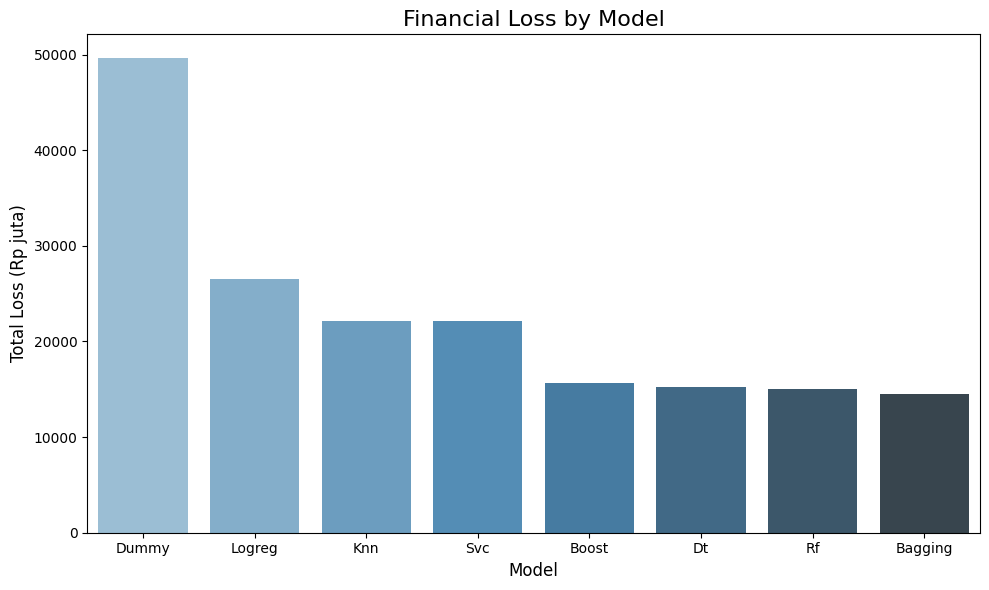

In [ ]:
financial_comparison_sorted = financial_comparison.sort_values(
    by='Total Loss (Rp juta)',ascending = False)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=financial_comparison_sorted,
    x='Model',
    y='Total Loss (Rp juta)',
    palette='Blues_d'  # Pilih palet warna
)

# Tambahkan label dan judul
plt.title('Financial Loss by Model', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Total Loss (Rp juta)', fontsize=12)



# Tampilkan plot
plt.tight_layout()
plt.show()

Model Bagging memiliki potential loss paling rendah